<h1>Netflix EDA</h1>

![<caption>](netflix.png)

## Introduction

This notebook will allocated to 3 parts<br><br>
Part 1: Data Writing and Cleaning<br>
Part 2: Data Augmentation<br>
Part 3: Questions and Answers<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 1 Data Writing and Cleaning

In [46]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Drop Unnecessary Columns

In [47]:
df.drop(["director", "date_added", "description"], axis=1, inplace=True)

In [27]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            718
country         507
release_year      0
rating            7
duration          0
listed_in         0
dtype: int64

In [48]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas


### Drop NaN Value of Cast and Rating

In [55]:
df = df[df["cast"].notna()]
df = df[df["rating"].notna()]



show_id           0
type              0
title             0
cast              0
country         410
release_year      0
rating            0
duration          0
listed_in         0
dtype: int64

### Change country NaN value to the most common country

In [59]:
df["country"] = df["country"].fillna(df["country"].value_counts().index.tolist()[0])
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

United States                                                         2658
India                                                                  894
United Kingdom                                                         332
Japan                                                                  221
South Korea                                                            180
                                                                      ... 
Chile, Argentina, France, Spain, United States                           1
United States, Canada, Germany                                           1
New Zealand, United Kingdom, Australia                                   1
United States, Canada, Indonesia, United Kingdom, China, Singapore       1
United Kingdom, France, Germany                                          1
Name: country, Length: 626, dtype: int64

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

## Part 2 Data Augmentation

### To create a main_country column

In [179]:
## Some of the country are in the list, we will use the first country in the list as main country
df["main_country"] = df["country"].apply(lambda x : x.split(",")[0])
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,main_country
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,United States


## Part 3 Questions and Answers

### Q1 Which actor has been mostly showed up in US Netflix movie or TV show?

In [62]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas


In [72]:
## Using of str.contains() instead of isin() because some cell contain multiple country in a list
df_US = df[df["country"].str.contains("United States")]
df_US.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas
7,s8,Movie,187,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1997,R,119 min,Dramas
10,s11,Movie,1922,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017,TV-MA,103 min,"Dramas, Thrillers"
11,s12,TV Show,1983,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"


In [74]:
## To iterate the list and make a counter
from itertools import combinations
from collections import Counter

In [132]:
count = Counter()

actor_list = []
count_list = []

for row in df_US["cast"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,1)))
    
## To create chart
for key, value in count.most_common(10):
    actor_list.append("".join(key).strip())
    count_list.append(value)

In [133]:
count.most_common(10)

[((' Andrea Libman',), 21),
 (('Adam Sandler',), 19),
 ((' Fred Tatasciore',), 17),
 ((' Vincent Tong',), 16),
 ((' Sean Astin',), 15),
 ((' Alfred Molina',), 14),
 ((' Molly Shannon',), 14),
 ((' Tara Strong',), 14),
 (('Nicolas Cage',), 14),
 ((' Maya Rudolph',), 13)]

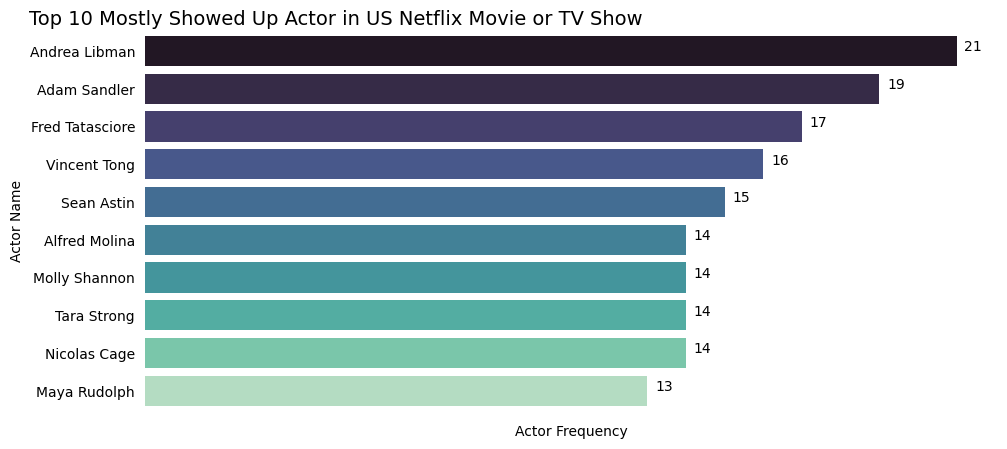

In [210]:
## Graphical Analysis

plt.figure(figsize=(11,5),dpi=100)

y_index = np.arange(len(actor_list))

sns.barplot(x=count_list,y=y_index, orient="h", palette="mako")

## Title and Axis Setting
plt.text(-3,-0.7,"Top 10 Mostly Showed Up Actor in US Netflix Movie or TV Show", fontsize=14) ## Title
plt.xlabel("Actor Frequency")
plt.xticks(count_list,[])
plt.ylabel("Actor Name")
plt.yticks(y_index, actor_list)
plt.box(on=None)

plt.tick_params(left=False, bottom=False)

## Chart Value Plotting
for x,y in zip(count_list,y_index):
    plt.text(x=x+0.2,y=y,s=x)

plt.show()

### Answer for Q1

In [139]:
print("By referring the data and graph, the mostly showed up actor is " + actor_list[0] + ".")

By referring the data and graph, the mostly showed up actor is Andrea Libman.


<br>

### Q2 Which country has made most Movie or TV Show 

In [181]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,main_country
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,United States


In [182]:
df_country = df[["type","main_country"]]

df_country.head()

,type,main_country
0,TV Show,Brazil
1,Movie,Mexico
2,Movie,Singapore
3,Movie,United States
4,Movie,United States


In [201]:
df_country.groupby("main_country").count().sort_values(by=["type"],ascending=False).head()

,type
main_country,
United States,2957
India,927
United Kingdom,500
Canada,234
Japan,231


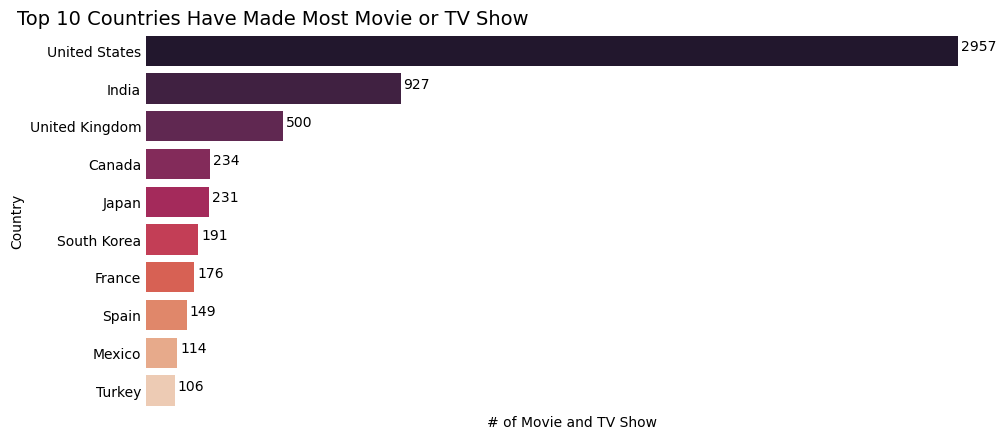

In [386]:
## Graphical Analysis
y = df_country.groupby("main_country").count().sort_values(by=["type"],ascending=False).index.tolist()[0:10]
y_index = np.arange(len(y))
x = df_country.groupby("main_country").count().sort_values(by=["type"],ascending=False).head(10)["type"]

plt.figure(figsize=(11,5),dpi=100)

sns.barplot(x=x,y=y_index,orient="h", palette="rocket")

## Title and Axis Setting
plt.text(-470,-0.7,"Top 10 Countries Have Made Most Movie or TV Show", fontsize=14) ## Title
plt.xlabel("# of Movie and TV Show")
plt.xticks([])
plt.ylabel("Country")
plt.yticks(y_index, y)
plt.box(on=None)
plt.tick_params(length=0)

## Chart Value Labelling
for x,y in zip(x,y_index):
    plt.text(x=x+10,y=y,s=x)

plt.show()

### Answer for Q2

In [231]:
print("The country has made most movie and tv show is " + df_country.groupby("main_country").count().sort_values(by=["type"],ascending=False).index.tolist()[0])

The country has made most movie and tv show is United States


### EXTRA: To Separate Both Movie and TV Show

In [294]:
## Top 10 countries made the most movie
df[df["type"] == "Movie"].groupby("main_country").count()["type"].sort_values(ascending = False).head(10)

main_country
United States     2079
India              868
United Kingdom     302
Canada             156
France             129
Spain              106
Egypt               92
Turkey              78
Hong Kong           74
Philippines         74
Name: type, dtype: int64

In [383]:
df[df["type"] == "TV Show"].groupby("main_country").count()["type"].sort_values(ascending = False).head(10)

main_country
United States     878
United Kingdom    198
Japan             159
South Korea       150
Canada             78
Taiwan             70
India              59
France             47
Australia          45
Spain              43
Name: type, dtype: int64

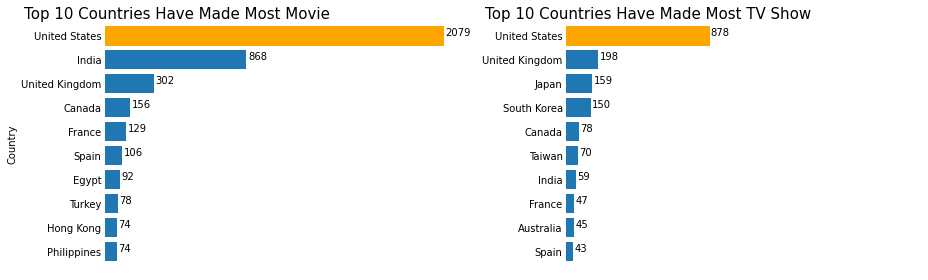

In [385]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,sharex=True, figsize=(13,4))

## Movie
x1 = df[df["type"] == "Movie"].groupby("main_country").count()["type"].sort_values(ascending = False).head(10).index.tolist()[::-1]
x1_index = np.arange(len(x1))
y1 = df[df["type"] == "Movie"].groupby("main_country").count()["type"].sort_values(ascending = False).head(10)[::-1]

## TV Show
x2 = df[df["type"] == "TV Show"].groupby("main_country").count()["type"].sort_values(ascending = False).head(10).index.tolist()[::-1]
x2_index = np.arange(len(x2))
y2 = df[df["type"] == "TV Show"].groupby("main_country").count()["type"].sort_values(ascending = False).head(10)[::-1]

b1 = ax1.barh(x1_index,y1)
b2 = ax2.barh(x2_index,y2)

b1[-1].set_color("orange")
b2[-1].set_color("orange")


## Title and Axis Setting
ax1.text(-500,9.7, "Top 10 Countries Have Made Most Movie", fontsize=15)
ax2.text(-500,9.7, "Top 10 Countries Have Made Most TV Show", fontsize=15)
ax1.set_yticks(x1_index)
ax1.set_yticklabels(x1)
ax2.set_yticks(x2_index)
ax2.set_yticklabels(x2)
ax1.set_ylabel("Country")


## Remove the frame and x-axis for both chart
ax_frame = ["top", "bottom", "left", "right"]
for ax in [ax1,ax2]:
    for frame in ax_frame:
        ax.spines[frame].set_visible(False)

ax1.yaxis.set_tick_params(length=0)
ax2.yaxis.set_tick_params(length=0)

ax1.get_xaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])

## Chart Value Plotting for both chart
for x, y in zip(y1,x1_index):
      ax1.text(x=x+10,y=y,s=x)
        
for x, y in zip(y2,x2_index):
      ax2.text(x=x+10,y=y,s=x)


plt.tight_layout()
plt.show()

### Q3 Ranking of the genre (Please include the percentage)

In [387]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,main_country
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,United States


In [404]:
## Create a counter to list down the top 10 genre
count = Counter()

genre_list = []
count_list = []

for row in df["listed_in"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,1)))

## To create chart
for key, value in count.items():
    genre_list.append("".join(key).strip())
    count_list.append(value)

In [415]:
genre_df = pd.DataFrame({
    "genre": genre_list[:10],
    "count": count_list[:10]
})

genre_df = genre_df.sort_values(by=["count"], ascending = False, ignore_index=True)
genre_df

,genre,count
0,International Movies,2162
1,Dramas,1377
2,Action & Adventure,715
3,International TV Shows,666
4,Independent Movies,651
5,TV Dramas,637
6,Horror Movies,244
7,Sci-Fi & Fantasy,204
8,TV Mysteries,86
9,TV Sci-Fi & Fantasy,74


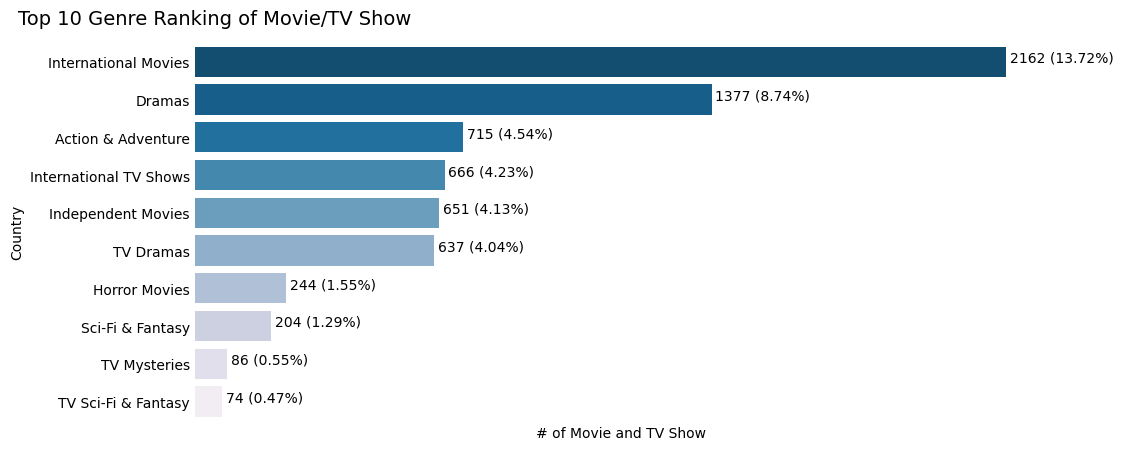

In [446]:
## I will prefer horizontal bar instead of pie chart if the variable more than 3
x = genre_df["count"]
y = genre_df["genre"]
y_index = np.arange(len(y))
movie_count = sum(count_list) ## To calculate the percentage of the genre

plt.figure(figsize=(11,5),dpi=100)

sns.barplot(x=x,y=y_index,orient="h", palette="PuBu_r")

## Title and Axis Setting
plt.text(-470,-1,"Top 10 Genre Ranking of Movie/TV Show", fontsize=14) ## Title
plt.xlabel("# of Movie and TV Show")
plt.xticks([])
plt.ylabel("Country")
plt.yticks(y_index, y)
plt.box(on=None)
plt.tick_params(length=0)


for x,y in zip(x,y_index):
    plt.text(x=x+10,y=y,s=str(x) + " (" + str(round((x/movie_count) * 100, 2)) + "%)")

plt.show()

### Answer for Q3

In [447]:
print("By referring to the graph, the top genre is Internatinal Movies which is 13.72% out of all the movies and tv show.")

By referring to the graph, the top genre is Internatinal Movies which is 13.72% out of all the movies and tv show.


<br>

### Q4 Visualize the graph for number of movie and tv show increase in decade 

In [449]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,main_country
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,United States


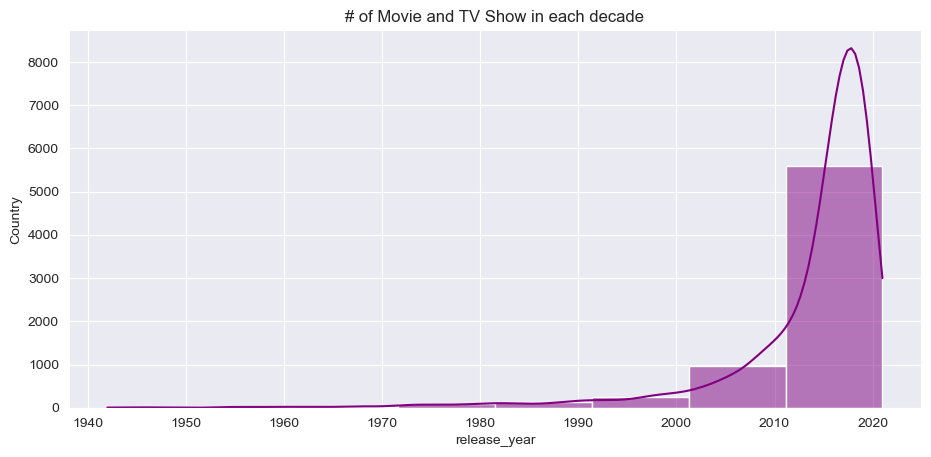

In [462]:
plt.figure(figsize=(11,5),dpi=100)

sns.set_style("darkgrid")
sns.histplot(df["release_year"], bins=8, kde=True, color="purple")

## Title and Axis Setting
plt.title("# of Movie and TV Show in each decade")
plt.ylabel("Country")

plt.show()

### Q5 Movie vs TV 

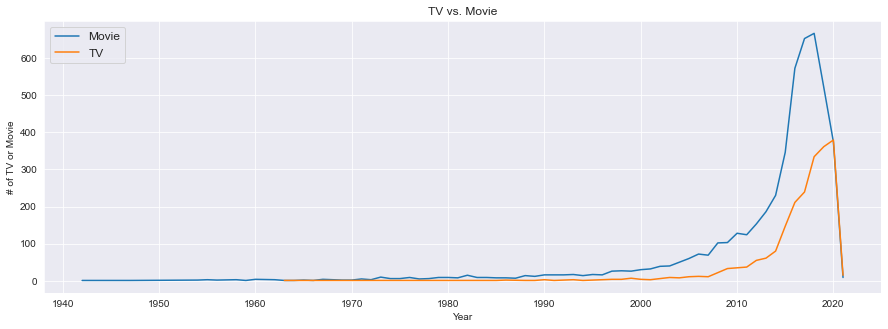

In [491]:
df_movie = df[df["type"] == "Movie"].groupby("release_year").count()["type"]
df_tvshow = df[df["type"] == "TV Show"].groupby("release_year").count()["type"]



plt.figure(figsize=(15,5))

sns.set_style(None)
sns.lineplot(data=df_movie)
sns.lineplot(data=df_tvshow)

plt.title("TV vs. Movie")
plt.xlabel("Year")
plt.ylabel("# of TV or Movie")
plt.legend(['Movie', 'TV'], fontsize='large')
plt.show()